<AxesSubplot:>

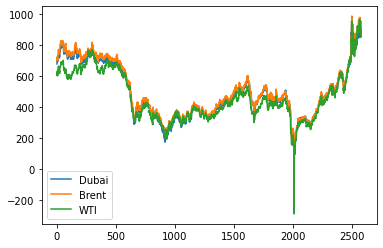

In [3]:
import pandas as pd 
import numpy as np
FILE = './data/inter_oil_price_origin.csv'
df = pd.read_csv(FILE, encoding='euc-kr')
df.plot()

In [4]:
df['연도'] = df['기간'].str.split('년', expand=True)[0]
df['연도'] = df['연도'].astype(int)
df.head(5)

,기간,Dubai,Brent,WTI,연도
0,12년07월02일,679.03,705.26,606.80,12
1,12년07월03일,685.49,724.27,630.60,12
2,12년07월04일,697.73,716.40,NaN,12
3,12년07월05일,699.52,719.09,622.83,12
4,12년07월06일,697.62,701.91,603.69,12


In [5]:
df2 = df.groupby('연도')[['Dubai', 'Brent', 'WTI']].mean()
df2.head(5)

,Dubai,Brent,WTI
연도,,,
12,747.357778,768.405156,631.749680
13,724.358560,748.406902,675.593574
14,637.505257,656.829255,613.472988
15,359.401815,380.105388,345.982937
16,301.355952,328.507752,316.308611


In [6]:
df3 = pd.DataFrame(df2.mean(axis=1), columns=['유가'])
df3

,유가
연도,
12,715.837538
13,716.119679
14,635.935833
15,361.830046
16,315.390772
17,376.262744
18,475.866206
19,451.288213
20,307.388137


In [7]:
df3.to_csv('inter_oil_price_origin_mean.csv')

In [8]:
pd.read_csv('inter_oil_price_origin_mean.csv')

,연도,유가
0,12,715.837538
1,13,716.119679
2,14,635.935833
3,15,361.830046
4,16,315.390772
5,17,376.262744
6,18,475.866206
7,19,451.288213
8,20,307.388137
9,21,501.496667


In [9]:
df['연'] = df['기간'].str.split('년', expand=True)[0]
df['달'] = df['기간'].str.split('년', expand=True)[1].str.split('월',expand=True)[0]
df.tail(5)
df['달'] = df['달'].astype(int)
df['반기'] = df['달'].apply(lambda x: (x-1) // 6 )
df.head(5)
df2 = df.groupby(['연', '반기'])[['Dubai', 'Brent', 'WTI']].mean()

pdf = pd.DataFrame(df2.mean(axis=1), columns=['유가'])
pdf

유가
연  반기            
12 1   715.837538
13 0   708.731067
   1   723.106503
14 0   692.783848
   1   580.712159
15 0   389.100093
   1   335.256284
16 0   291.733384
   1   338.678363
17 0   368.827961
   1   383.523727
18 0   461.556249
   1   490.009613
19 0   454.333959
   1   448.369567
20 0   300.749580
   1   313.857827
21 0   448.078362
   1   553.128213
22 0   799.833350

In [10]:
pdf.to_csv('inter_oil_price_origin_half.csv')

In [13]:
df = pd.read_csv('./data/inter_oil_price_origin_mean.csv', encoding='euc-kr')
df['월'] = df['기간'].str.split('월', expand=True)[[0]]
df

UnicodeDecodeError: 'euc_kr' codec can't decode byte 0xec in position 0: illegal multibyte sequence

In [64]:
dfmonth = df.groupby(['월']).mean().mean(axis=1).to_frame()

dfmonth.rename(columns={0:'유가'}, inplace=True)
dfmonth

,유가
월,
12년07,694.581017
12년08,748.434783
12년09,751.742868
12년10,720.214842
12년11,692.128528
...,...
22년02,698.867404
22년03,848.459710
22년04,802.310667


In [65]:
dfmonth.to_csv('inter_oil_price_month.csv')

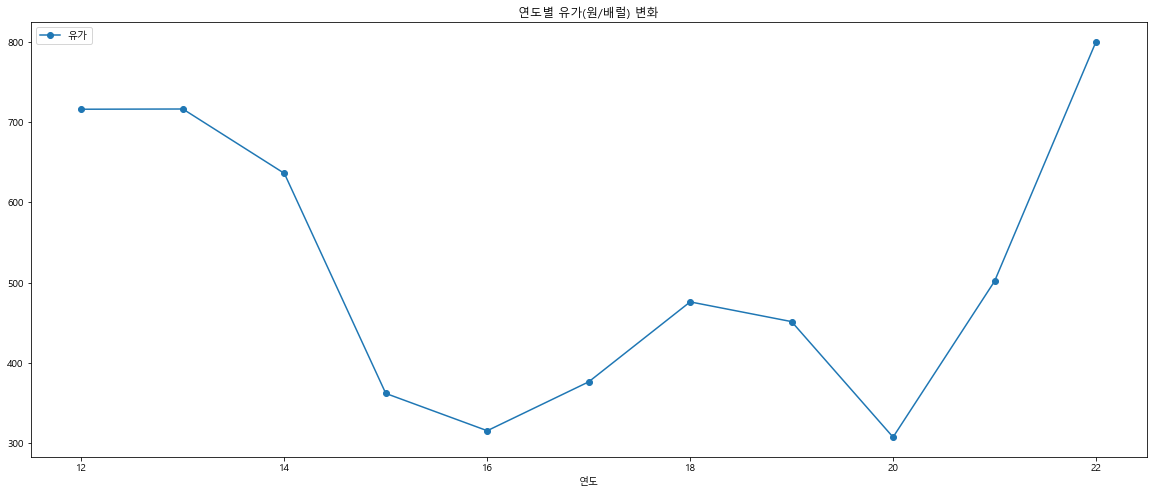

In [15]:
from matplotlib import markers
import matplotlib.pyplot as plt
import platform
%matplotlib inline

if	platform.system()	==	'Windows':
        plt.rc('font',	family='Malgun Gothic')
else:
    plt.rc('font',	family='AppleGothic')
plt.rcParams['figure.figsize'] = (20,8)
pd.read_csv('./Data/' +'inter_oil_price_year.csv', index_col=0).plot(title='연도별 유가(원/배럴) 변화', marker='o')
df = pd.read_csv('./Data/' +'inter_oil_price_half.csv', index_col=0)


In [16]:
df.reset_index(inplace=True)
df['연반기'] = df['반기'].replace(1,0.5).values +pd.Series(df['연'])
df.set_index('연반기', inplace=True)

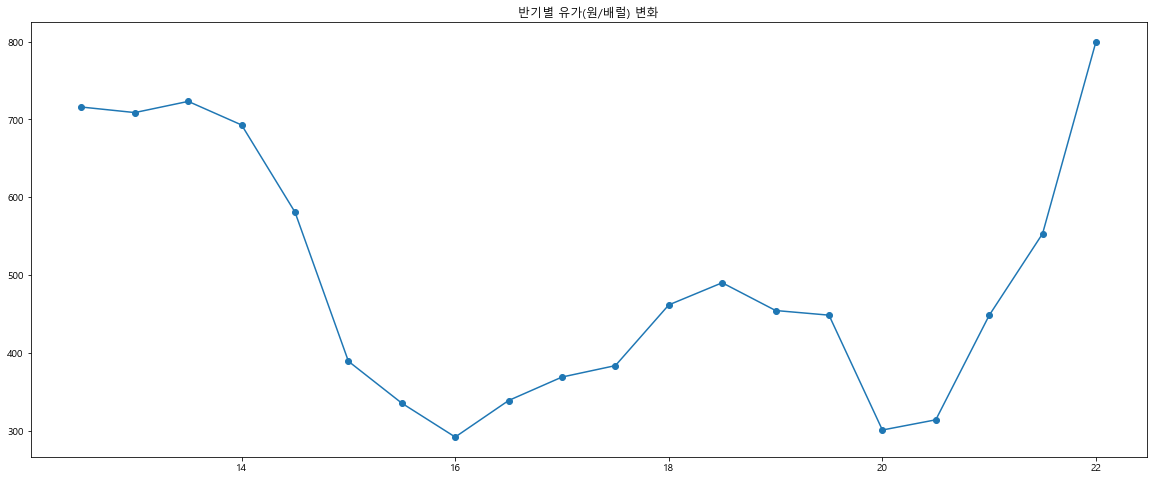

In [17]:
plt.title('반기별 유가(원/배럴) 변화')
plt.xlabel = df.index.to_list()
plt.plot(df['유가'], marker='o')